# [5월 16일]
---

## # 객체 탐지 (Object Detection)
---
- 한 이미지에서 객체와 그 경계 상자를 탐지
- 객체 탐지 알고리즘은 일반적으로 이미지를 입력으로 받고 경계 상자와 객체
클래스 리스트를 출력
- 경계 상자에 대해 그에 대응하는 예측 클래스와 클래스의 신뢰도를 출력
- 참고 :  
https://intrepidgeeks.com/tutorial/yoloobject-detection  
https://www.secmem.org/blog/2021/06/20/Object_Detection/

### # Applications
---
- 자율 주행 자동차에서 다른 자동차와 보행자를 찾을 때
- 의료 분야에서 방사선 사진을 사용해 종양이나 위험한 조직을 찾을 때
- 제조업에서 조립 로봇이 제품을 조립하거나 수리할 때
- 보안 산업에서 위협을 탐지하거나 사람 수를 셀 때

### # Bounding Box
---
- 이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

  <img src="https://miro.medium.com/max/850/1*KL6r494Eyfh3iYEXQA2tzg.png">

  <sub>[이미지 출처] https://medium.com/anolytics/how-bounding-box-annotation-helps-object-detection-in-machine-learning-use-cases-431d93e7b25b</sub>


### # IOU(Intersection Over Union)
---
- 실측값(Ground Truth) 과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표
IOU = Area of Overlap / Area of Union  
IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="300">
<br>
  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">

<br>

- 예시
  <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg">

  <sub>[이미지 출처] https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/</sub>


### # 비최댓값 억제(NMS)와 mAP(mean Average Precision)
---

https://bkshin.tistory.com/entry/%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%84-6-%EB%B9%84%EC%B5%9C%EB%8C%93%EA%B0%92-%EC%96%B5%EC%A0%9CNMS%EC%99%80-mAPmean-Average-Precision


비최댓값 억제의 입력값과 출력값, 절차

- 입력값(input): 예측 경계 박스들의 리스트(B), 경계 박스들의 신뢰도 점수(Confidence Score), IoU 임계값(N)
- 출력값(output): 최종 경계 박스들의 리스트(D)
- 비최댓값 억제 절차
  - B에서 신뢰도 점수가 가장 높은 경계 박스를 선택해 D에 추가합니다(D는 처음에 빈 리스트입니다). 그리고 B에서 해당 경계 박스를 제거합니다.
  - 방금 D에 추가한 경계 박스와 B에 있는 다른 모든 경계 박스를 비교해 IoU를 계산합니다. 만약 IoU가 IoU 임계값(N)보다 크면 그 경계 박스를 B에서 제거합니다(이 절차는 신뢰도 점수가 가장 높은 경계 박스와 겹치는 다른 경계 박스를 제거하는 방법입니다. 꼭 필요한 경계 박스만 남기기 위해서죠).
  - 다시 B에서 신뢰도 점수가 가장 높은 경계 박스를 선택해 D에 추가하고, 해당 경계 박스를 B에서 제거합니다.
  - 이 경계 박스와 B에 있는 다른 모든 경계 박스를 비교해 IoU를 계산하고, IoU 임계값(N)보다 큰 경계 박스들을 B에서 제거합니다.
  - 이 과정을 B에 아무것도 남지 않을 때까지 반복합니다.

이 절차를 반복하면 예측한 경계 박스 중 가장 정확한 경계 박스만 남습니다. 다시 말해, 가장 물체를 잘 나타내는 경계 박스만 남습니다. 이렇게 비최댓값 억제 기법을 사용해야 쓸데없는 경계 박스들을 없앨 수 있습니다.


### # NMS(Non-Maximum Suppression, 비최댓값 억제)
---
- 확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정
- 최댓값을 갖지 않는 상자들을 제거 과정
 - 확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함
 - 각 상자에 대해 다른 모든 상자와의 IOU를 계산
 - 특정 임곗값을 넘는 상자는 제거

  <img src="https://pyimagesearch.com/wp-content/uploads/2014/10/nms_fast_03.jpg">

  <sub>[이미지 출처] https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/</sub>


## # YOLO 아키텍처
---

- 백본 모델(backbone model) 기반
- 특징 추출기(Feature Extractor)라고도 불림
- YOLO는 자체 맞춤 아키텍쳐 사용

  <img src="https://user-images.githubusercontent.com/26322627/70716343-8e857200-1d2f-11ea-8e60-9c75f24ca9ce.png">

### # YOLO Backbone
---

- 백본 모델(backbone model) 기반

- 특징 추출기(Feature Extractor)라고도 불림

- YOLO는 자체 맞춤 아키텍쳐 사용

- 어떤 특징 추출기 아키텍쳐를 사용했는지에 따라 성능 달라짐

  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">

  <sub>[이미지 출처] https://www.researchgate.net/figure/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three_fig1_335865923</sub>

### # 앵커 박스(Anchor Box)

- YOLOv2에서 도입

- 사전 정의된 상자(prior box)

- 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 사용해 앵커 박스의 크기를 조정하는 과정때문에 $t_x, t_y, t_w, t_h$이 필요

  <img src="https://kr.mathworks.com/help/vision/ug/ssd_detection.png">

  <sub>[이미지 출처] https://kr.mathworks.com/help/vision/ug/getting-started-with-yolo-v2.html</sub>

### # 파이토치
---
- 딥러닝 프레임워크 파이토치
  - 파이토치란 데이터에 대한 딥러닝 분석을 쉽게 할 수 있도록 제공하는 오픈소스 기반 딥러닝 프레임워크이다.
  - Data Science 분야의 개발자로 프로그래밍을 하기 위해서 꼭 사용해야 하는 툴 중 하나가 딥러닝 프레임워크(Deep Learning Frameworks)인데 그중에 하나가 바로 파이토치(PyTorch)인 것이다.
  - 딥러닝 프레임워크를 툴로써 제공하기 때문에 개발자는 보다 손쉽게 프로그래밍을 할 수 있다.
  - 예를 들어 딥러닝 프레임워크는 요리사에게 재료 준비와 손질까지 된 환경을 제공해준다고 볼 수 있다.
  - 파이토치는 파이썬 기반으로 바로 사용할 수 있다는 점에서 개발 과정이 텐서플로우보다 심플하다.

- pytorch tutorials : https://tutorials.pytorch.kr/
- yolov3 pytorch 버전 : https://github.com/ultralytics/yolov3
- yolov5 : https://github.com/ultralytics/yolov5

## # YOLOv3
---

### # YOLOv3 설치
---

In [1]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -qr requirements.txt

import yaml
import torch
from IPython.display import Image, clear_output
print(f"Torch: {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov3'...
remote: Enumerating objects: 10012, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10012 (delta 3), reused 1 (delta 0), pack-reused 10002
Receiving objects: 100% (10012/10012), 9.33 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (6750/6750), done.
/content/yolov3
     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 1.8 MB 42.3 MB/s 
     |████████████████████████████████| 145 kB 38.0 MB/s 
     |████████████████████████████████| 181 kB 48.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
Torch: 1.11.0+cu113 (Tesla P100-PCIE-16GB)


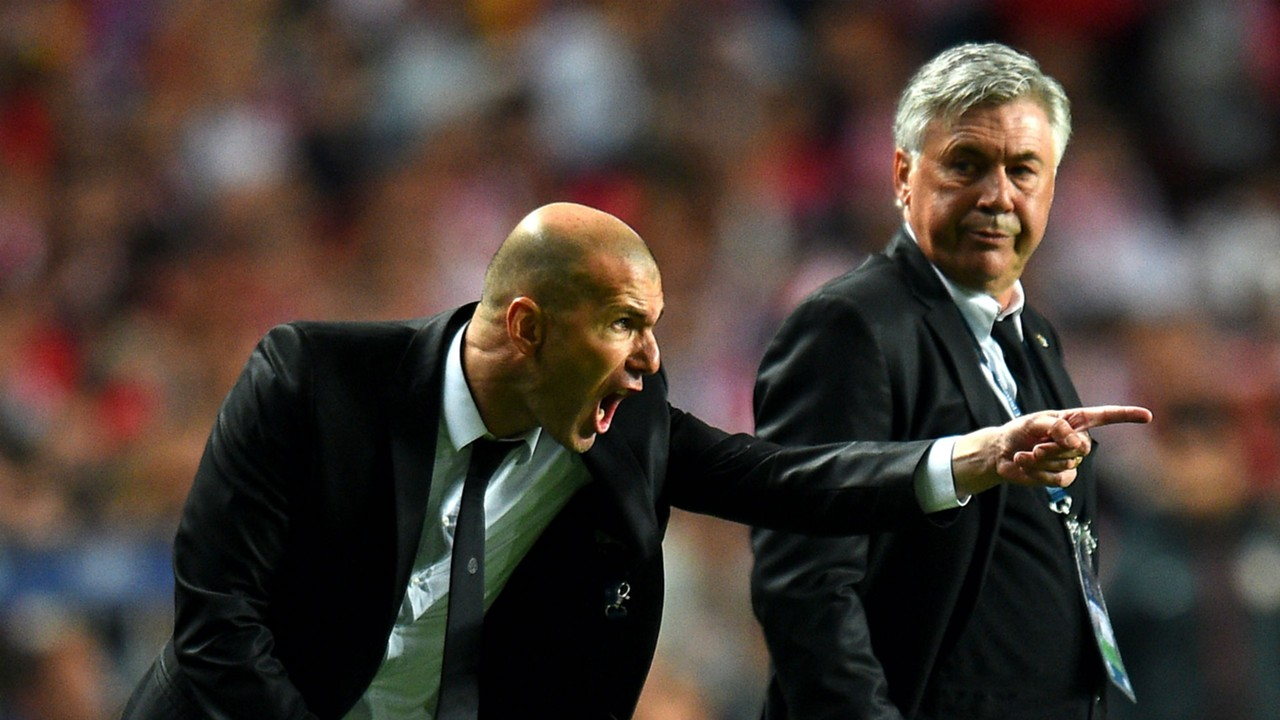

In [ ]:
Image(filename = 'data/images/zidane.jpg', width = 600)

In [ ]:
!pwd

/content/yolov3


### # 객체 탐지
---

In [ ]:
# 탐지 실행

!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images/

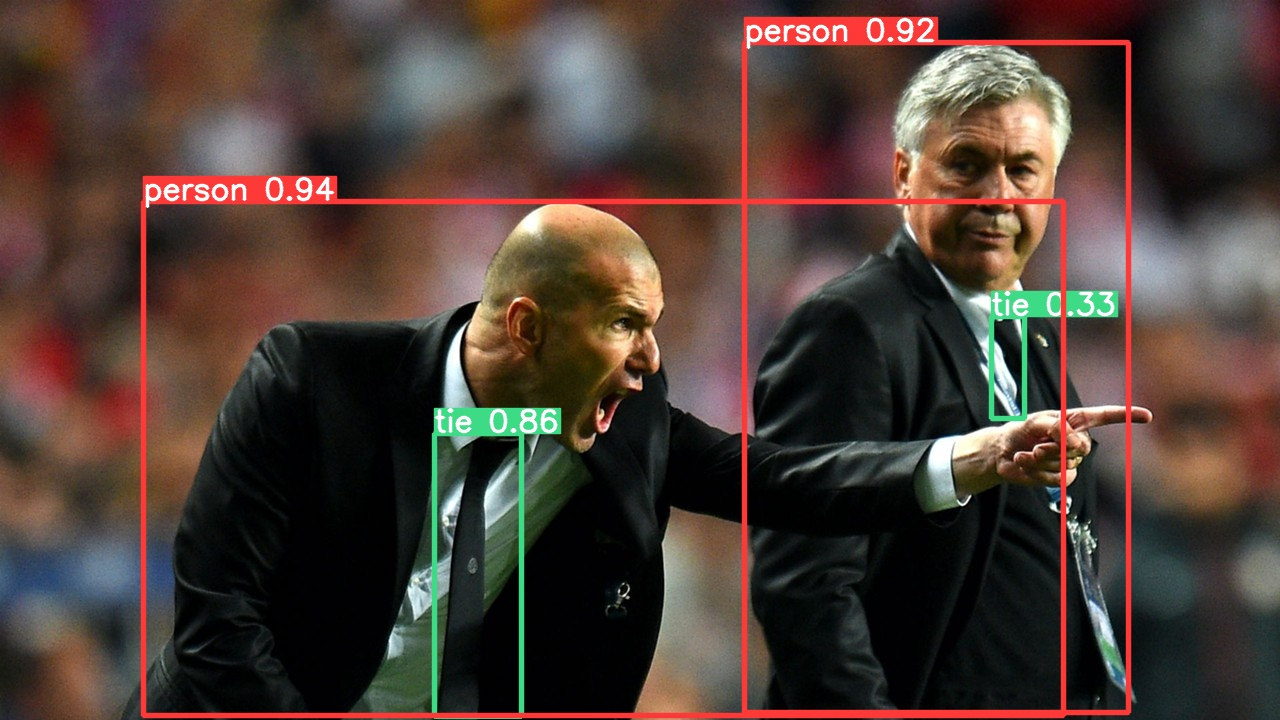

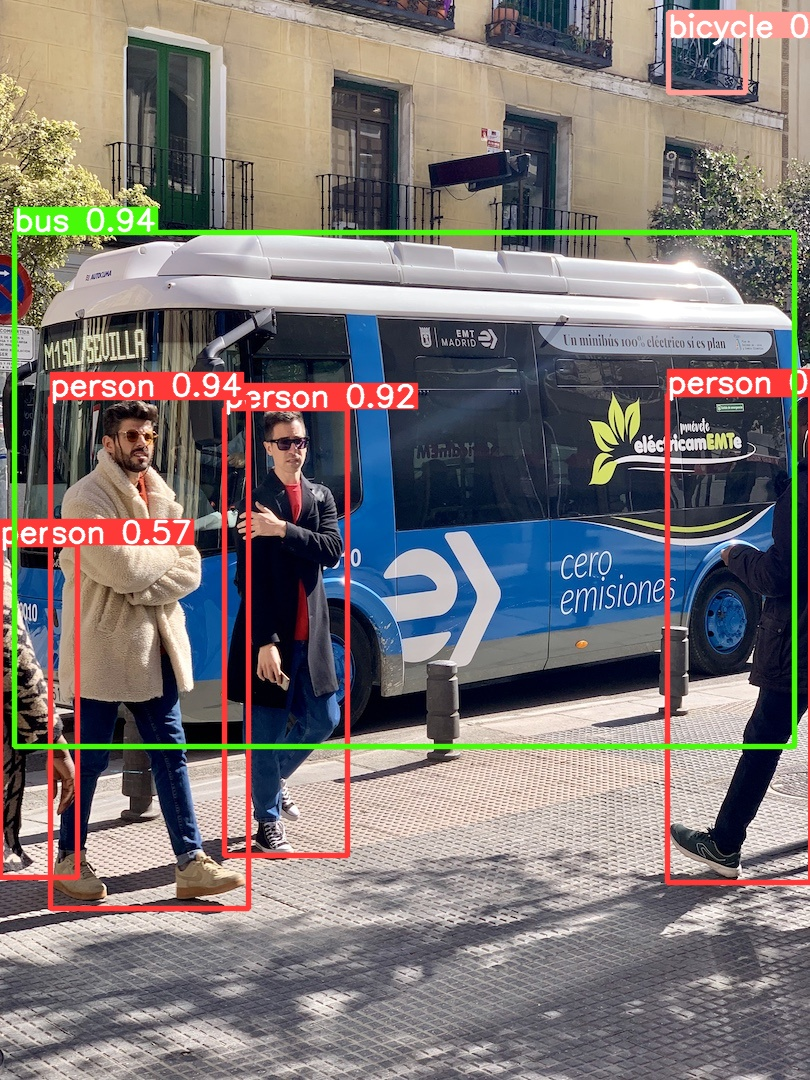

In [ ]:
# 탐지 결과

display(Image(filename='runs/detect/exp/zidane.jpg',width=600))
display(Image(filename='runs/detect/exp/bus.jpg',width=600))

## # YOLOv5
---

### # YOLOv5 설치
---

In [ ]:
%cd /content

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import yaml
import torch
from IPython.display import Image, clear_output
print(f"Torch: {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13410, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 13410 (delta 22), reused 35 (delta 16), pack-reused 13368
Receiving objects: 100% (13410/13410), 12.12 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (9345/9345), done.
/content/yolov5
Torch: 1.11.0+cu113 (Tesla T4)


### # 객체 탐지
---

In [ ]:
# 탐지 실행

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 17.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.017s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.019s)
Speed: 0.5ms pre-process, 18.4ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


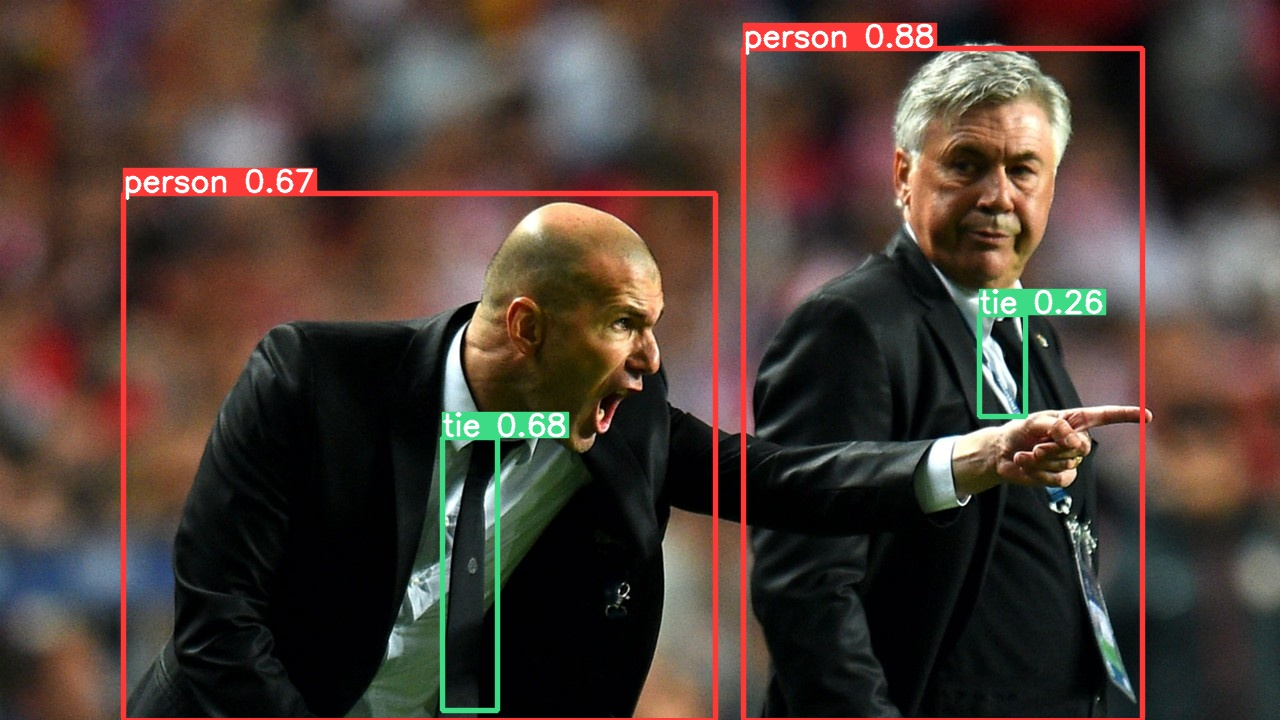

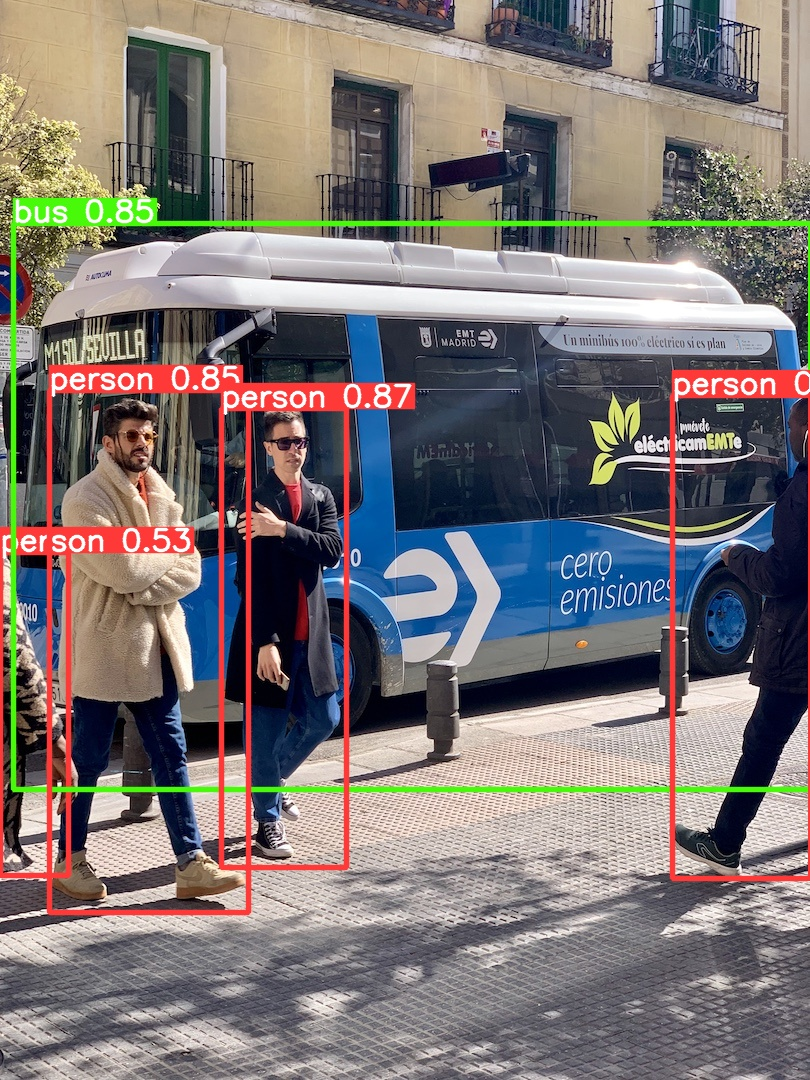

In [ ]:
# 탐지 결과

display(Image(filename='runs/detect/exp/zidane.jpg',width=600))
display(Image(filename='runs/detect/exp/bus.jpg',width=600))